In [1]:
import pymc as pm
import scipy.stats as stats
import bambi as bmb
import pandas as pd
import numpy as np
from data335 import lm, stan_lm, bambi_lm, mad
from matplotlib import pyplot as plt

In [2]:
with pm.Model():
    mu = pm.Normal("mu", mu=0.524, sigma=0.041)
    x = pm.Normal("x", mu=mu, sigma=0.025, observed=[0.475])
    idata = pm.sample()

mu = idata["posterior"].data_vars["mu"].to_numpy().ravel()
print()
print(f"mu.mean() = {mu.mean():.3f}, mu.std() = {mu.std():.3f}")
print(f"np.median(mu) = {np.median(mu):.3f}, mad(mu) = {mad(mu):.3f}")

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



mu.mean() = 0.489, mu.std() = 0.022
np.median(mu) = 0.489, mad(mu) = 0.022


In [3]:
with pm.Model():
    mu = pm.Normal("mu", mu=0.524, sigma=0.041)
    x = pm.Normal("x", mu=mu, sigma=0.075, observed=[0.475])
    idata = pm.sample()

mu = idata["posterior"].data_vars["mu"].to_numpy().ravel()
print()
print(f"mu.mean() = {mu.mean():.3f}, mu.std() = {mu.std():.3f}")
print(f"np.median(mu) = {np.median(mu):.3f}, mad(mu) = {mad(mu):.3f}")

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



mu.mean() = 0.511, mu.std() = 0.036
np.median(mu) = 0.510, mad(mu) = 0.036


In [4]:
with pm.Model():
    p = pm.Normal("p", mu=0.524, sigma=0.041)  # prior
    y = pm.Binomial("y", n=400, p=p, observed=[np.round(0.475 * 400)])  # data
    posterior = pm.sample()["posterior"]  # posterior

p = posterior.data_vars["p"].to_numpy().ravel()
print()
print(f"p.mean() = {p.mean():.3f}, p.std() = {p.std():.3f}")
print(f"np.median(p) = {np.median(p):.3f}, mad(p) = {mad(p):.3f}")

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



p.mean() = 0.489, p.std() = 0.022
np.median(p) = 0.490, mad(p) = 0.022


In [5]:
with pm.Model():
    p = pm.Normal("p", mu=0.524, sigma=0.041)  # prior
    y = pm.Binomial("y", n=44, p=p, observed=[np.round(0.475 * 44)])  # data
    posterior = pm.sample()["posterior"]  # posterior

p = posterior.data_vars["p"].to_numpy().ravel()
print()
print(f"p.mean() = {p.mean():.3f}, p.std() = {p.std():.3f}")
print(f"np.median(p) = {np.median(p):.3f}, mad(p) = {mad(p):.3f}")

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



p.mean() = 0.513, p.std() = 0.036
np.median(p) = 0.512, mad(p) = 0.036


In [6]:
# Hat tip John D. Cook!
# https://www.johndcook.com/blog/2021/04/07/beta-given-mean-variance/

mu = 0.524
sigma = 0.041

a = mu * (mu * (1 - mu) / sigma**2 - 1)
b = a * (1 - mu) / mu

assert np.allclose(a / (a + b), [mu, stats.beta(a, b).mean()])
assert np.allclose(
    np.sqrt(a * b / (a + b) ** 2 / (a + b + 1)), [sigma, stats.beta(a, b).std()]
)

In [7]:
with pm.Model():
    p = pm.Beta("p", alpha=a, beta=b)  # prior
    y = pm.Binomial("y", n=400, p=p, observed=[np.round(0.475 * 400)])  # data
    posterior = pm.sample()["posterior"]  # posterior

p = posterior.data_vars["p"].to_numpy().ravel()
print()
print(f"p.mean() = {p.mean():.3f}, p.std() = {p.std():.3f}")
print(f"np.median(p) = {np.median(p):.3f}, mad(p) = {mad(p):.3f}")

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.



p.mean() = 0.489, p.std() = 0.021
np.median(p) = 0.489, mad(p) = 0.021


In [8]:
a, b

(77.22625342058299, 70.15209280190363)

In [9]:
y0 = np.round(a)
n0 = np.round(a + b)
p0 = y0 / n0
se0 = np.sqrt(p0 * (1 - p0) / n0)
y0, n0, se0

(77.0, 147.0, 0.041192521824455666)

In [10]:
y = 190
n = 400

In [11]:
p = (y + y0) / (n + n0)
se = np.sqrt(p * (1 - p) / (n + n0))
p, se

(0.48811700182815354, 0.02137241787024956)

#### Sex ratio logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
N = 3000
n1 = 300
y1 = int(np.round(0.44 * n1))
n0 = N - n1
y0 = int(np.round(0.52 * n0))

X = np.concatenate([np.zeros(n0), np.ones(n1)])
Y0 = np.zeros(n0)
Y0[:y0] = 1
Y1 = np.zeros(n1)
Y1[:y1] = 1
Y = np.concatenate([Y0, Y1])

In [14]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1), Y)
model.coef_

array([[-0.31538062]])

### Chapter 10

In [15]:
from sklearn.linear_model import LinearRegression
from matplotlib.axes import Axes
from numbers import Real
from sklearn.utils.validation import check_is_fitted
from typing import Any

In [16]:
kidiq = pd.read_csv("../data/kidiq.csv")
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [17]:
kid_score = kidiq["kid_score"]
mom_hs = kidiq[["mom_hs"]]
mom_iq = kidiq[["mom_iq"]]

mom_hs_model = LinearRegression()
mom_hs_model.fit(mom_hs, kid_score)
a_hs = mom_hs_model.intercept_
b_hs = mom_hs_model.coef_[0]

mom_iq_model = LinearRegression()
mom_iq_model.fit(mom_iq, kid_score)
a_iq = mom_iq_model.intercept_
b_iq = mom_iq_model.coef_[0]

In [18]:
def plot_regression_line(
    model, ax: Axes | None = None, xlim: tuple[Any, Any] | None = None, **kwargs
):
    if isinstance(model, LinearRegression):
        check_is_fitted(estimator=model, attributes=("intercept_", "coef_"))
        a = model.intercept_
        b = model.coef_[0]
    else:
        a = model[0]
        b = model[1]
    ax = plt.gca() if ax is None else ax
    if xlim is not None:
        xmin = xlim[0]
        xmax = xlim[1]
    else:
        xmin, xmax = ax.get_xlim()
    ax.plot([xmin, xmax], [a + b * xmin, a + b * xmax], **kwargs)

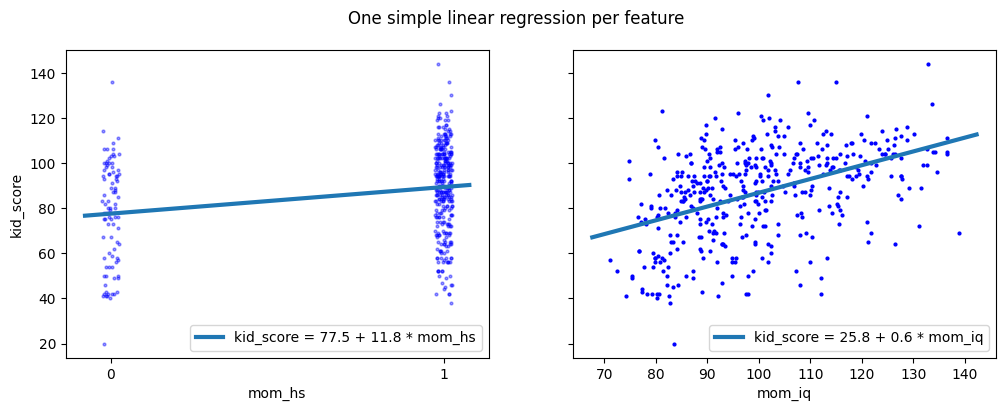

In [19]:
fig, (ax_hs, ax_iq) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 4))

fig.suptitle("One simple linear regression per feature")

jitter = 0.05 * np.random.uniform(-0.5, 0.5, size=mom_hs.shape)
ax_hs.scatter(mom_hs + jitter, kid_score, s=4, color=(0, 0, 1, 0.4))
ax_hs.set_xlabel("mom_hs")
ax_hs.set_xticks([0, 1])
ax_hs.set_ylabel("kid_score")
plot_regression_line(
    mom_hs_model, ax=ax_hs, lw=3, label=f"kid_score = {a_hs:.1f} + {b_hs:.1f} * mom_hs"
)
ax_hs.legend(loc="lower right")

kidiq.plot.scatter("mom_iq", "kid_score", ax=ax_iq, s=4, color=(0, 0, 1))
plot_regression_line(
    mom_iq_model, ax=ax_iq, lw=3, label=f"kid_score = {a_iq:.1f} + {b_iq:.1f} * mom_iq"
)
ax_iq.legend(loc="lower right")
plt.show()

#### Linear regression with two predictors

In [20]:
model = LinearRegression()
model.fit(kidiq[["mom_hs", "mom_iq"]], kidiq["kid_score"])
a = model.intercept_
b = model.coef_[0]
c = model.coef_[1]
print(
    f"kid_score   =   {a:.1f}   +   {b:.1f} * mom_hs   +   {c:.1f} * mom_iq   +   error"
)

kid_score   =   25.7   +   6.0 * mom_hs   +   0.6 * mom_iq   +   error


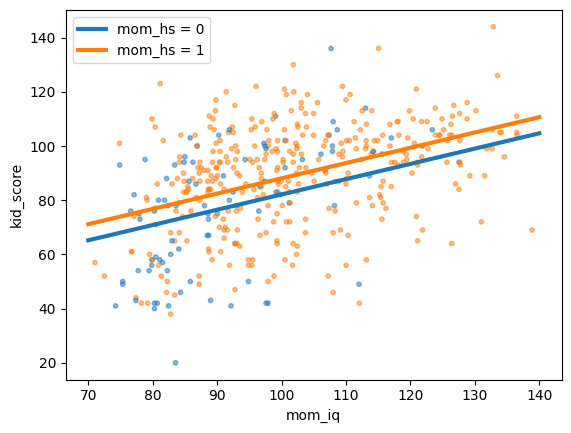

In [21]:
kidiq.plot.scatter(
    "mom_iq",
    "kid_score",
    s=10,
    c=["C0" if x == 0 else "C1" for x in kidiq["mom_hs"]],
    alpha=0.5,
)
plot_regression_line((a, c), lw=3, label="mom_hs = 0", xlim=(70, 140))
plot_regression_line((a + b, c), lw=3, label="mom_hs = 1", xlim=(70, 140))
plt.legend()
plt.show()

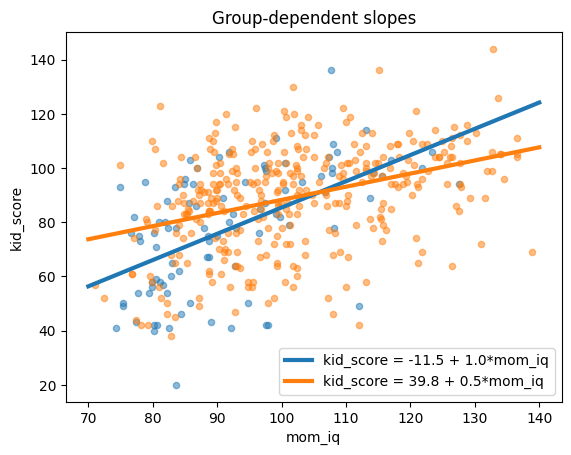

In [22]:
ax = plt.gca()
for hs, group in kidiq.groupby("mom_hs"):
    group.plot.scatter("mom_iq", "kid_score", color=f"C{hs}", alpha=0.5, ax=ax)
    model = LinearRegression()
    model.fit(group[["mom_iq"]], group["kid_score"])
    a = model.intercept_
    b = model.coef_[0]
    plot_regression_line(
        model,
        lw=3,
        ax=ax,
        xlim=(70, 140),
        label=f"kid_score = {a:.1f} + {b:.1f}*mom_iq",
    )
ax.legend()
ax.set_title("Group-dependent slopes")
plt.show()

In [23]:
kidiq["mom_hs:mom_iq"] = kidiq["mom_hs"] * kidiq["mom_iq"]

model = LinearRegression()
model.fit(kidiq[["mom_hs", "mom_iq", "mom_hs:mom_iq"]], kidiq["kid_score"])
a = model.intercept_
b = model.coef_[0]
c = model.coef_[1]
d = model.coef_[2]
print(
    f"kid_score  =  {a:.1f}  +  {b:.1f} * mom_hs  +  {c:.1f} * mom_iq  +  {d:.1f} * mom_hs:mom_iq  +   error"
)
print("\nIf mom_hs = 0:")
print(f"kid_score  =  {a:.1f}  +  {c:.1f} * mom_iq  +  error")
print("\nIf mom_hs = 1:")
print(f"kid_score  =   {a + b:.1f}  +  {c + d:.1f} * mom_iq  +  error")

kid_score  =  -11.5  +  51.3 * mom_hs  +  1.0 * mom_iq  +  -0.5 * mom_hs:mom_iq  +   error

If mom_hs = 0:
kid_score  =  -11.5  +  1.0 * mom_iq  +  error

If mom_hs = 1:
kid_score  =   39.8  +  0.5 * mom_iq  +  error


In [24]:
lm("kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq", kidiq)

,estimate,standard error,t-statistic,p-value
Intercept,-11.482021,13.757974,-0.834572,0.404422
mom_hs,51.268223,15.337581,3.342654,0.000902
mom_iq,0.968889,0.148344,6.53138,0.0
mom_hs:mom_iq,-0.484275,0.162217,-2.98535,0.002994
sigma,17.971466,,,


In [25]:
stan_lm("kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq", kidiq)

13:35:41 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:35:43 - cmdstanpy - INFO - CmdStan done processing.


,median,mad_sd
Intercept,-12.080750,14.140393
mom_hs,51.878850,15.706095
mom_iq,0.975482,0.153025
mom_hs:mom_iq,-0.491182,0.166508
sigma,17.997500,0.610165


In [26]:
bambi_lm("kid_score ~ mom_hs + mom_iq + mom_hs:mom_iq", kidiq)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, mom_hs, mom_iq, mom_hs:mom_iq]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


,median,mad_sd
sigma,17.971005,0.606940
Intercept,-10.039906,14.013643
mom_hs,49.858735,15.793845
mom_iq,0.954365,0.153968
mom_hs:mom_iq,-0.469009,0.168353


In [27]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from typing import Sequence
from formulaic import model_matrix, ModelSpec, ModelSpecs, ModelMatrix
from arviz import InferenceData
from dataclasses import dataclass, field
from numpy.typing import ArrayLike, NDArray
from cmdstanpy import CmdStanModel, CmdStanMCMC
from bambi import Model as BambiModel
from IPython.display import display

In [28]:
fit = stan_lm("kid_score ~ mom_hs", kidiq)

13:35:50 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

13:35:51 - cmdstanpy - INFO - CmdStan done processing.


In [29]:
newdata = pd.DataFrame({"mom_hs": [0, 1, 1, 1]})
y = fit.posterior_predict(newdata)
y.mean(axis=1)

array([77.76439374, 89.59441733, 89.59441733, 89.59441733])

In [30]:
y.shape

(4, 4000)